In [69]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

df = pd.read_csv('Weather_prediction.csv')
df.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [70]:
l = df.columns
for i in l:
    df[i].fillna(0,inplace = True)

In [71]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,0.0,27.0,0.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,0.0,0.0,7.4
1,19961101-12:00,Smoke,10.0,0,0,0.0,32.0,0.0,-9999.0,0,0,28.0,0,0,0.0,0.0,North,0.0,0.0,0.0
2,19961101-13:00,Smoke,11.0,0,0,0.0,44.0,0.0,-9999.0,0,0,24.0,0,0,0.0,0.0,North,0.0,0.0,0.0
3,19961101-14:00,Smoke,10.0,0,0,0.0,41.0,0.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,0.0,0.0,0.0
4,19961101-16:00,Smoke,11.0,0,0,0.0,47.0,0.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0,0.0,0.0


In [72]:
df1 = df[[' _dewptm', ' _fog', ' _hail',' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain']]
df1.head()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain
0,9.0,0,0,0.0,27.0,0.0,1010.0,0
1,10.0,0,0,0.0,32.0,0.0,-9999.0,0
2,11.0,0,0,0.0,44.0,0.0,-9999.0,0
3,10.0,0,0,0.0,41.0,0.0,1010.0,0
4,11.0,0,0,0.0,47.0,0.0,1011.0,0


In [73]:
X = np.asarray(df1[[' _dewptm', ' _fog', ' _hail',' _heatindexm', ' _hum', ' _precipm', ' _pressurem']])

In [74]:
y = np.asarray(df1[' _rain'])
y [0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [75]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.93, -0.27, -0.01, -0.63, -1.26,  0.  , -0.  ],
       [-0.79, -0.27, -0.01, -0.63, -1.05,  0.  , -0.04],
       [-0.65, -0.27, -0.01, -0.63, -0.56,  0.  , -0.04],
       [-0.79, -0.27, -0.01, -0.63, -0.68,  0.  , -0.  ],
       [-0.65, -0.27, -0.01, -0.63, -0.43,  0.  , -0.  ]])

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (80792, 7) (80792,)
Test set: (20198, 7) (20198,)


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[ 1.  ,  0.  ],
       [ 0.99,  0.01],
       [ 1.  ,  0.  ],
       ..., 
       [ 0.99,  0.01],
       [ 0.95,  0.05],
       [ 0.95,  0.05]])

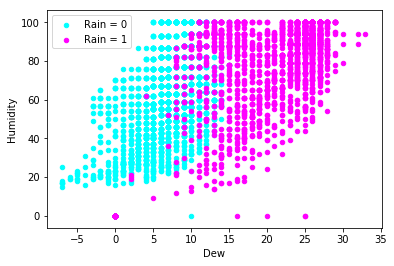

In [80]:
ax = df1[df1[' _rain'] == 0][0:2500].plot(kind='scatter', x=' _dewptm', y=' _hum', color='cyan', label='Rain = 0');
df1[df1[' _rain'] == 1][0:2500].plot(kind='scatter', x=' _dewptm', y=' _hum', color='magenta', label='Rain = 1', ax=ax)
plt.xlabel('Dew')
plt.ylabel('Humidity')
plt.show()

In [84]:
from sklearn.metrics import jaccard_similarity_score
print("Model Accuracy:",jaccard_similarity_score(y_test, yhat))

Model Accuracy: 0.973413209229


In [82]:
print (classification_report(y_test, yhat))

             precision    recall  f1-score   support

          0       0.97      1.00      0.99     19661
          1       0.00      0.00      0.00       537

avg / total       0.95      0.97      0.96     20198



C:\Users\Ananya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
